# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campaign dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv', encoding='unicode_escape')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
# Checking the missing values
per_missing_values = (df.isnull().sum()/len(df))*100
per_missing_values

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

- there are missing values in 'Income' Column 

- Replacing missing values with mean value

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

- Now there are no missing values in the dataset

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
# Checking the duplicate records in the dataset
df.duplicated().sum()

0

- There are no duplicate values in the dataset

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
# Checking the columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [10]:
# Dropping the columns
df= df.drop(columns=['ID','Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [12]:
# Checking the 'Marital_STatus' column
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
# Replacing the  categories 'Married', 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace(["Married","Together"], "relationship")

# Replacing the  categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], "Single")

In [14]:
# Checking the column after replacing categories
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
df['Total_Expenses'] = df['MntWines']+df['MntFruits']+ df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [16]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']+ df[ 'NumStorePurchases']+df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [17]:
df['Kids'] = df['Kidhome'] + df[ 'Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [18]:
df['TotalAcceptedCmp'] = df ['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+df['AcceptedCmp4']+ df['AcceptedCmp5']+df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [19]:
df = df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                      'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases',
                      'Kidhome','Teenhome',
                      'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'])


In [20]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [21]:
from datetime import date

In [22]:
# Calculating age by year_birth
df['Age'] = date.today().year-df['Year_Birth']

df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [23]:
# Dropping the 'Year_Birth' columns after age extraction
df = df.drop(['Year_Birth'], axis=1)

In [24]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42


In [25]:
# Copying dataset before the modifications
df_copy =df.copy()

### 13. Encode the categorical variables in the dataset

In [26]:
 # Checking the categorical variables 
    
cat_data = df.select_dtypes(include="O")
cat_data.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,relationship
3,Graduation,relationship
4,PhD,relationship


In [27]:
# selecting categorical columns
selectedColumns = ['Education', 'Marital_Status']

In [28]:
# Encoding the variables by label encoder
le = LabelEncoder()

for col in selectedColumns:
    df[col] = df[[col]].apply(le.fit_transform)

In [29]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,66
1,2,0,46344.0,38,5,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [30]:
df1 = df.copy()

sc = StandardScaler()

scaled_ftr = sc.fit_transform(df1.values)

scaled_ftr_df = pd.DataFrame(scaled_ftr, index= df1.index, columns=df1.columns)

In [31]:
# standardized columns 
scaled_ftr_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.350141,0.742460,0.358568,-0.107383,-0.130463,-0.097282,1.221032,0.408829,0.065928,-0.501912,0.150717
2236,1.428354,0.742460,0.470064,0.237969,0.693904,-0.097282,-0.268717,0.929970,2.726794,0.621248,1.903435
2237,-0.350141,-1.346874,0.189106,1.446700,0.281720,-0.097282,1.054951,0.539114,-1.264505,0.621248,-1.017761
2238,0.539106,0.742460,0.679035,-1.419719,-0.954831,-0.097282,0.393948,1.060255,0.065928,-0.501912,1.068807


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [32]:
## Calculating covariance matrix

cov_matrices = np.cov(scaled_ftr_df.T)
print(cov_matrices)

[[ 1.00044663 -0.01375403  0.1200273  -0.01173369 -0.04029882 -0.05056252
   0.09209518  0.09405439  0.05321304  0.06327892  0.17146685]
 [-0.01375403  1.00044663  0.00463847 -0.00450972  0.00344176 -0.00520466
  -0.01775232  0.00671037  0.03917598 -0.06004206 -0.0042384 ]
 [ 0.1200273   0.00463847  1.00044663 -0.00394826 -0.55006966 -0.02723528
   0.66500337  0.5636214  -0.29084155  0.28717443  0.16101378]
 [-0.01173369 -0.00450972 -0.00394826  1.00044663 -0.02145427  0.01323699
   0.02044173  0.00574294  0.01806145 -0.08900203  0.01987996]
 [-0.04029882  0.00344176 -0.55006966 -0.02145427  1.00044663  0.01977734
  -0.50044131 -0.31242795  0.41860616 -0.12836726 -0.12119336]
 [-0.05056252 -0.00520466 -0.02723528  0.01323699  0.01977734  1.00044663
  -0.03707503 -0.02059185  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518 -0.01775232  0.66500337  0.02044173 -0.50044131 -0.03707503
   1.00044663  0.75423984 -0.49911047  0.4564099   0.11135611]
 [ 0.09405439  0.00671037  0.5636214   0.

In [33]:
## Calculating eigen values and eigen vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrices)


print("eigen values: ", eig_vals)
print("~"*100)
print("\neigen vectors: ", eig_vecs)

eigen values:  [3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

eigen vectors:  [[-8.10878879e-02 -1.28355184e-02 -2.36293947e-02 -5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02 -5.44320001e-04 -2.67214391e-03 -7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01 -1.10208189e-01  7.33626969e-01 -1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03 -3.74604574e-02  1.76527197e-02 -1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.786583

In [34]:
#Calculating the variance explained 

total_eig_values = sum(eig_vals)

var_exp = [(i/total_eig_values)*100 for i in sorted(eig_vals, reverse=True)]

#calculating the cummulative variance explained
cum_var_exp = np.cumsum(var_exp)

#printing variance explained and cummulative variance explained
print("variance explained : \n\n", var_exp)
print("~"*124)
print("\nCummulative variance explained : \n\n ", cum_var_exp)

variance explained : 

 [28.99063120103076, 11.427867418203103, 9.773866099738862, 9.240104772844964, 9.070420346680967, 8.020823626792344, 7.404693691240495, 6.368828985843828, 5.222829816381421, 3.0353006494361634, 1.4446333918070957]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cummulative variance explained : 

  [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


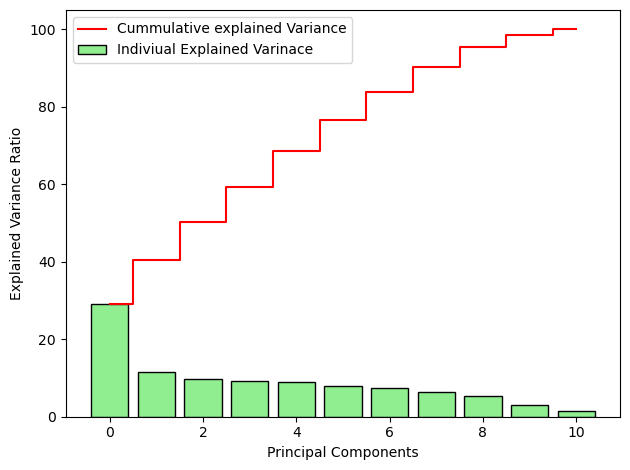

In [36]:
## Scree plot

plt.bar(range(11), var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')

plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')

plt.legend(loc = 'best')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

In [38]:
## Fitting the PCA model
pca=PCA(n_components = 9)
pca.fit(scaled_ftr_df)

PCA(n_components=9)

In [42]:
data_pca = pca.transform(scaled_ftr_df)

data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8', 'PC9'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [43]:
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, random_state=100)
    
    clusters.fit(data_pca)
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,2,18133.246696
1,3,16680.632624
2,4,14487.962478
3,5,13352.274530
4,6,12393.430723
5,7,11725.544060
6,8,11182.276343
7,9,10733.371471
8,10,10359.177906
9,11,10009.283334


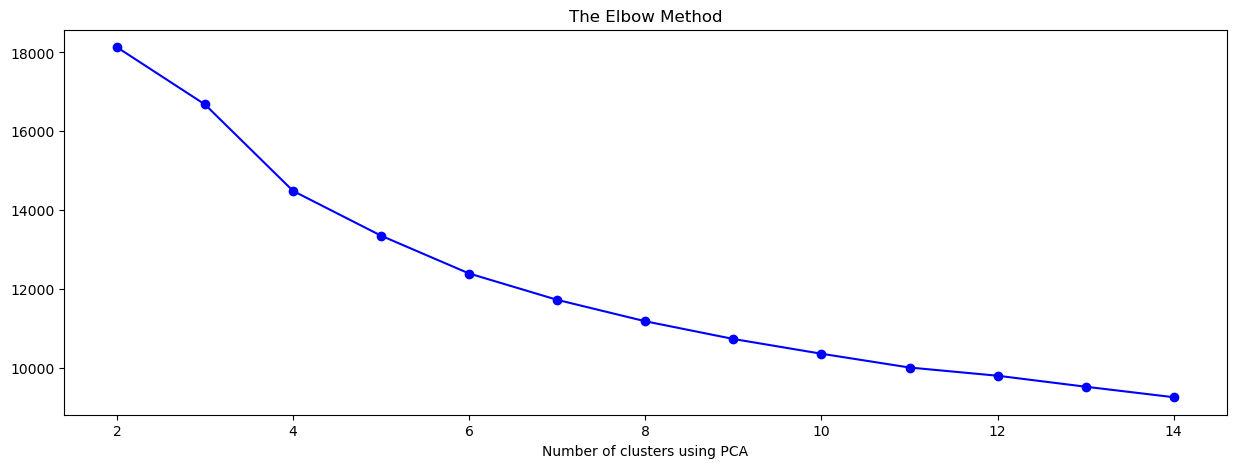

In [44]:
# Elbow method
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=4, random_state=100)

In [46]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])
label.head()

,Label
0,3
1,1
2,0
3,1
4,0


In [47]:
kmeans_df = data_pca.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873,3
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878,0


In [48]:
kmeans_df["Label"].value_counts(normalize=True)*100

1    45.044643
0    31.383929
3    22.633929
2     0.937500
Name: Label, dtype: float64

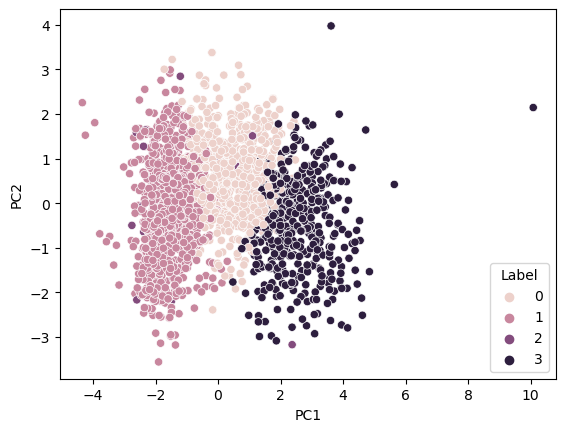

In [49]:
sns.scatterplot( x=kmeans_df['PC1'], y=kmeans_df['PC2'], hue='Label' , data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

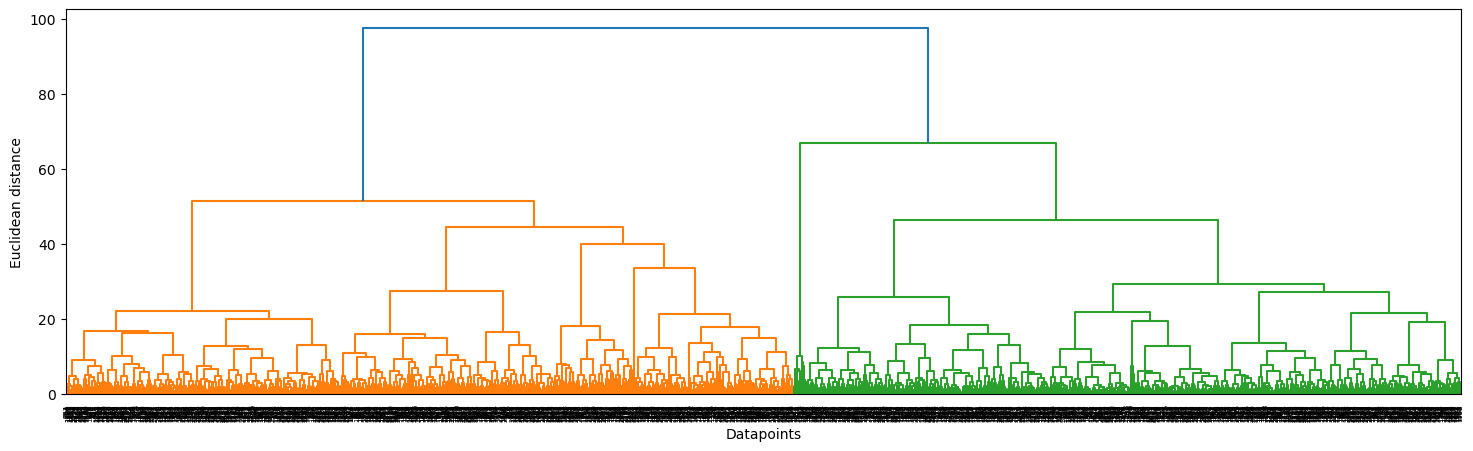

In [50]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_ftr, method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [51]:
#silhoutte score

from sklearn.metrics import silhouette_score

In [52]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_ftr_df)
    labels = hier.fit_predict(scaled_ftr_df)
    print(i, silhouette_score(scaled_ftr_df, labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249


- highest silhoutte score - 0.1985 (3rd cluster)

- Choosing k= 3 as the optimal cluster size and building an agglomerative clustering model using the original scaled dataset

In [53]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model  = hie_cluster.fit(scaled_ftr_df)

In [54]:
df_label = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label.head()

,Labels
0,0
1,1
2,0
3,1
4,0


In [55]:
df_hier = df_copy.join(df_label)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42,0


In [56]:
hie_cluster

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

### Visualization and Interpretation of results

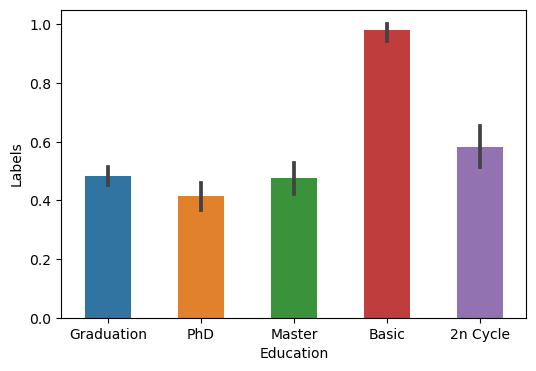

In [84]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Education'], y=df_hier['Labels'], width=0.5 )
plt.show()

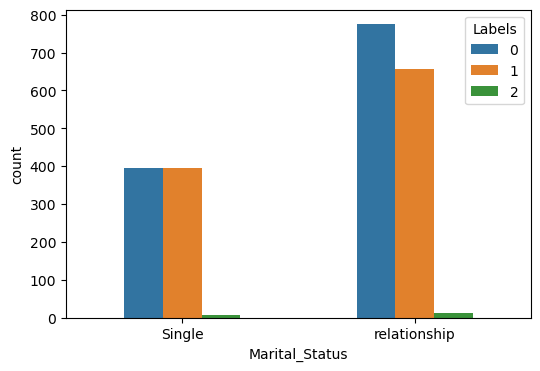

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_hier['Marital_Status'], hue='Labels', data=df_hier, width=0.5)
plt.show()

- Numbers of Customers who are in relationship are more than number of customers who are single

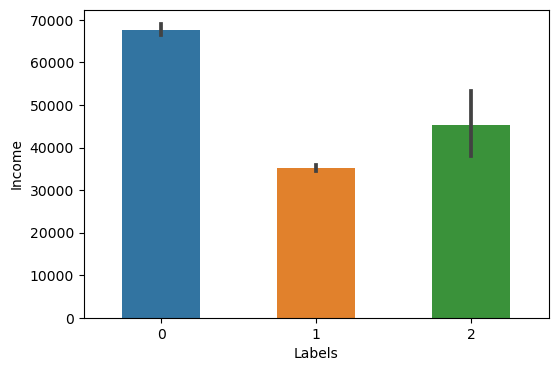

In [57]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['Income'], width=0.5)
plt.show()

- Customers' yearly household Income lies between 30000 to 70000.
- High Income Customers belong to Group 0 



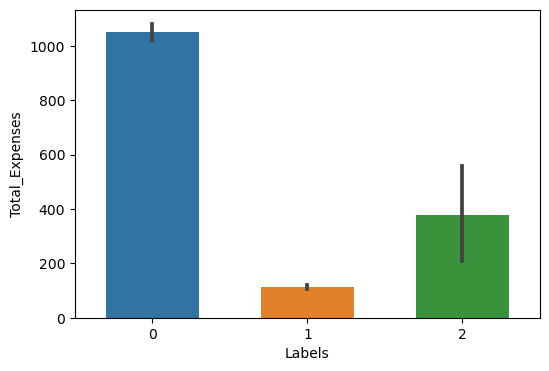

In [58]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['Total_Expenses'], width=.6)
plt.show()

- Customers' maximum expenses are for Group 0 and minimum for Group 1

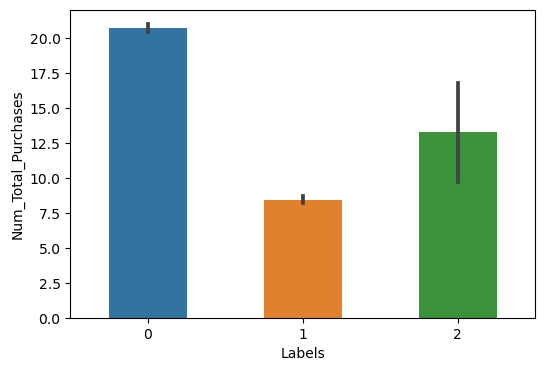

In [80]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['Num_Total_Purchases'], width=0.5)
plt.show()

- most purchases are from Group 0 , then Group 2 and the least one is Group 1

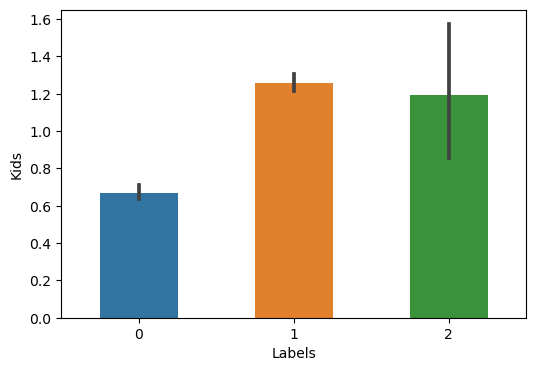

In [81]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['Kids'], width=0.5)
plt.show()

- Customers of Group 1 have more no. of kids than other groups 

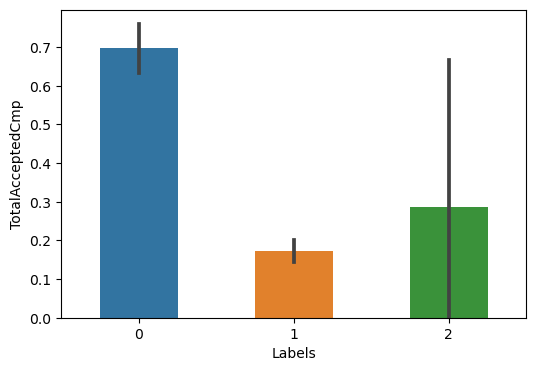

In [82]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['TotalAcceptedCmp'], width=0.5)
plt.show()

- Group 0 consists of large no. of customers who accepted offers in the campaigns

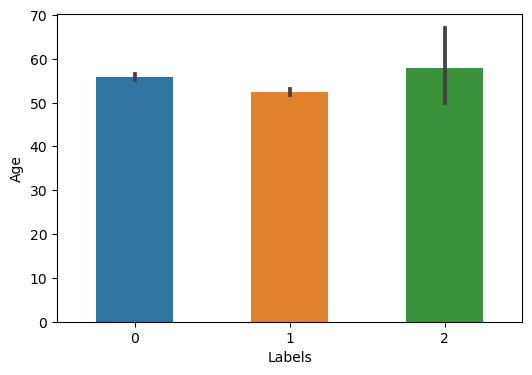

In [83]:
plt.figure(figsize=[6,4])
sns.barplot(x=df_hier['Labels'], y=df_hier['Age'], width=0.5)
plt.show()

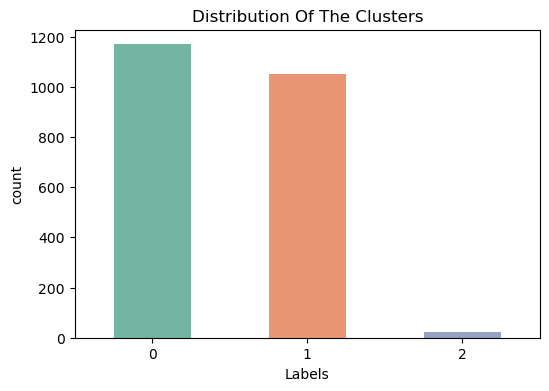

In [70]:
plt.figure(figsize=(6,4))
plts = sns.countplot(x=df_hier["Labels"], palette= 'Set2', width=0.5)
plts.set_title("Distribution Of The Clusters")
plt.show()

- We can see most customers are in Group 0

-----
## Happy Learning
-----